## Spot segmentation performed by Siri
These images have been segmented using Cellpose. The intensity has been shifted up and down to see the spots better. Can they be used as ground truth? 

Problem as explained by Siri:
- Estimated size is used as input to Cellpose, but the size of the dots vary between cells. Therefore it is hard to find one model in Cellpose that catches all spots.
- Time consuming, since there is a lot of manually labelling because the model doesn't catch all spots.

Some thoughts:
- Using model that does not limit spot size
- Assess the noise vs signal- ratio: What is the bakground intensity in each cell? At what intensity to we start to count spots? How to handle noise at higher pixel values, meaning when do we merge dots?
- Background intensity not easy to find since there are also dark areas with no light (cellular fat deposits).
- May not be able to use model on all cells in the dataset since they differ a lot. Perhaps restrict ourselves to cells that are treated the same way as the cellular data set (only starvation, no other treatments)
- Can we use these images as GT for a spot segmentation method if we use a masked loss function (to take into account that all dots haven't been found)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tifffile
from cellpose import models, plot, utils, io
from cellpose.io import imread
import os
from matplotlib.colors import LinearSegmentedColormap
#model = models.Cellpose(model_type='cyto3')

def tiff_to_array(tiff_path):
    with tifffile.TiffFile(tiff_path) as tiff:
        image = tiff.asarray() 
    return image

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY1.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


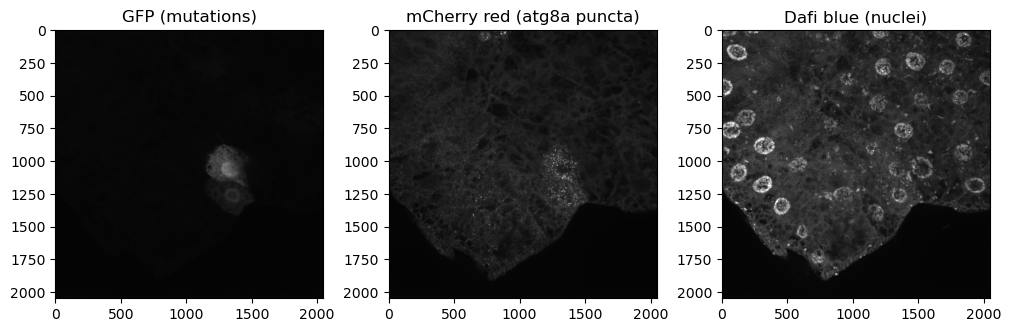

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY3.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


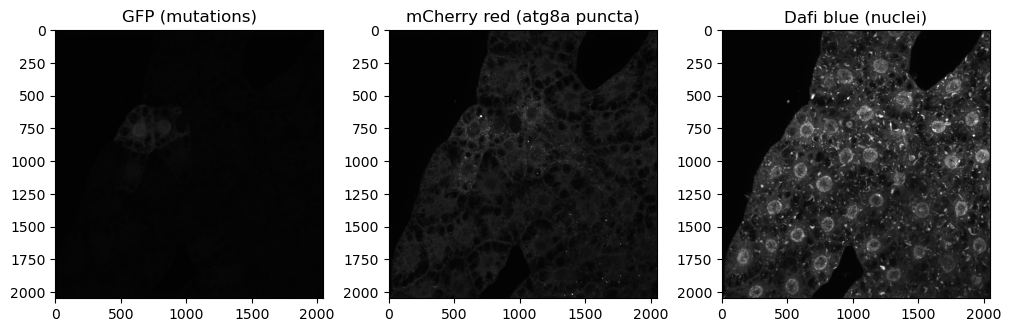

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY4.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


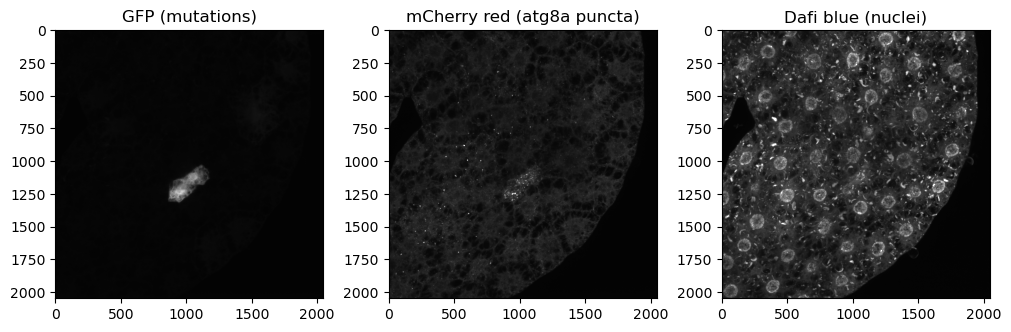

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY5.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


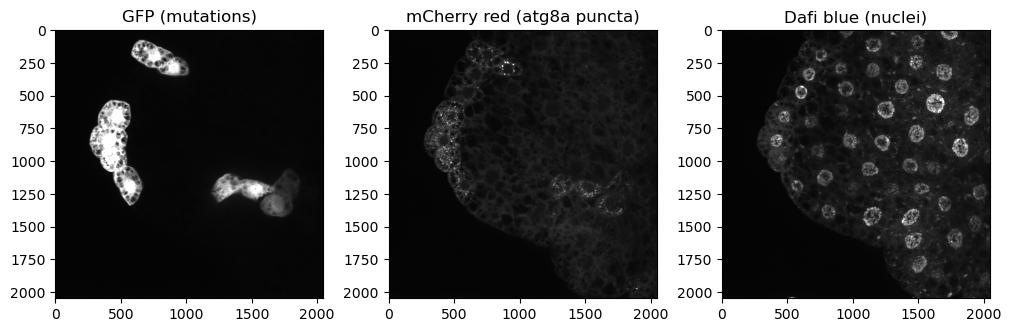

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY6.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


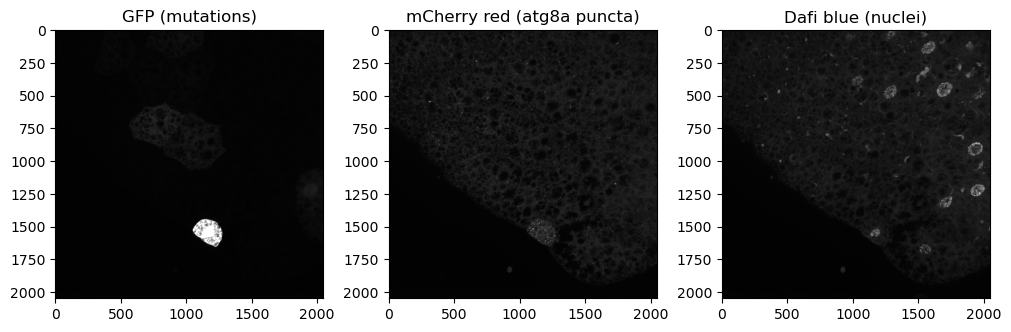

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_R1h_XY1.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


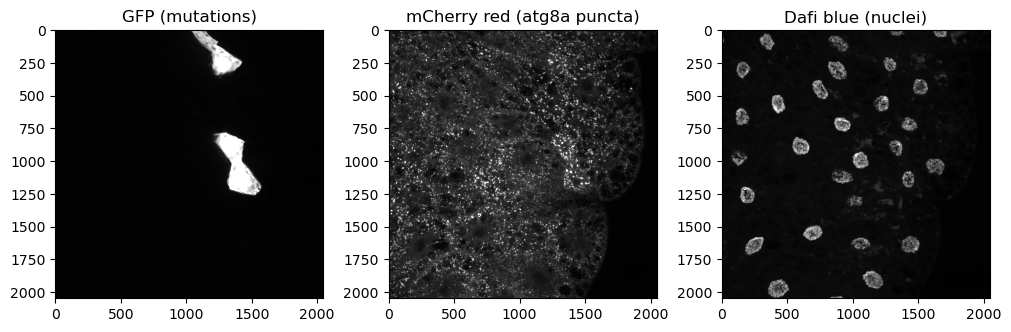

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_R1h_XY4.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


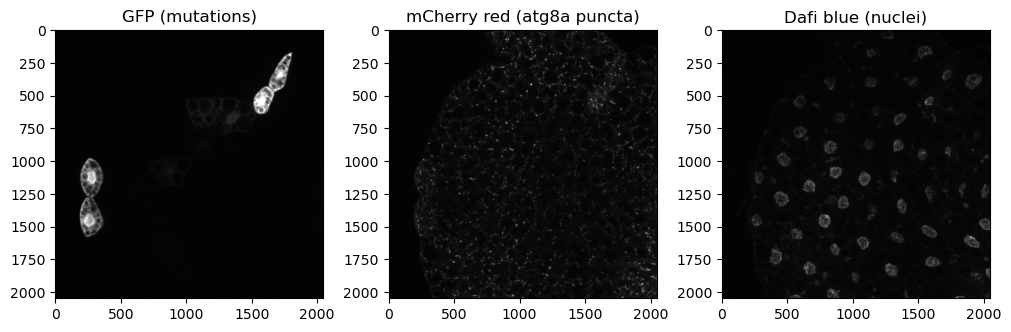

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_R1h_XY5.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


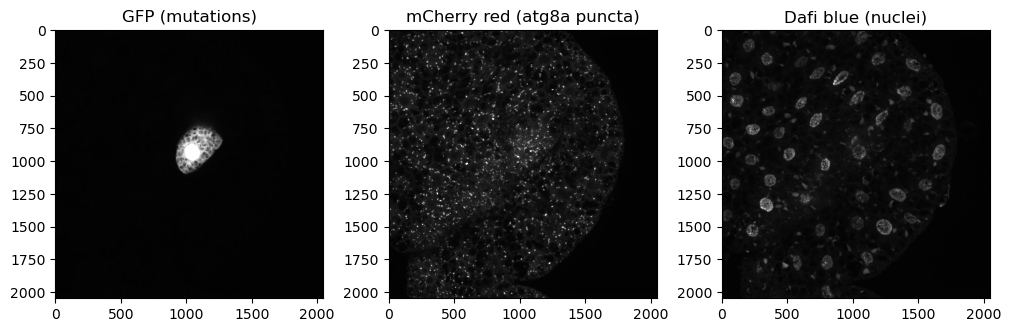

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_S4h_XY1.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


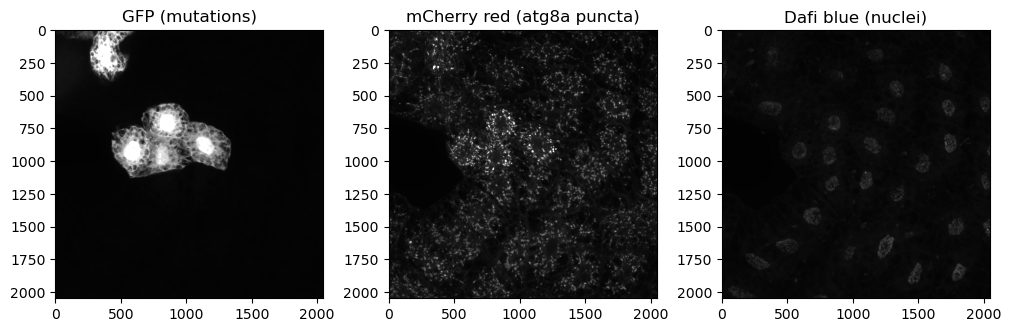

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_S4h_XY2.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


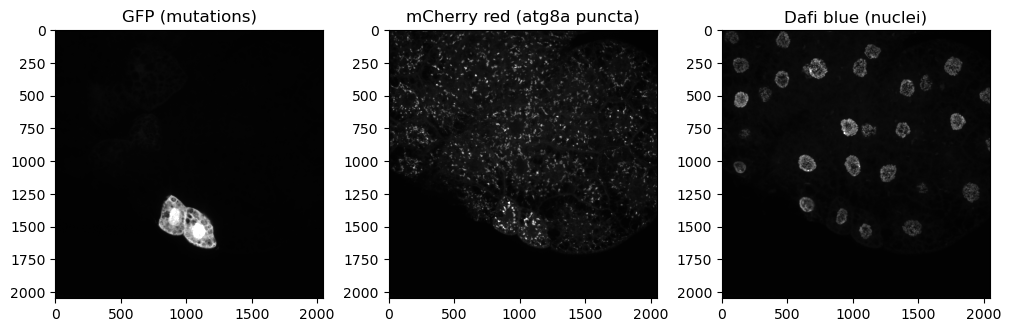

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_S4h_XY3.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


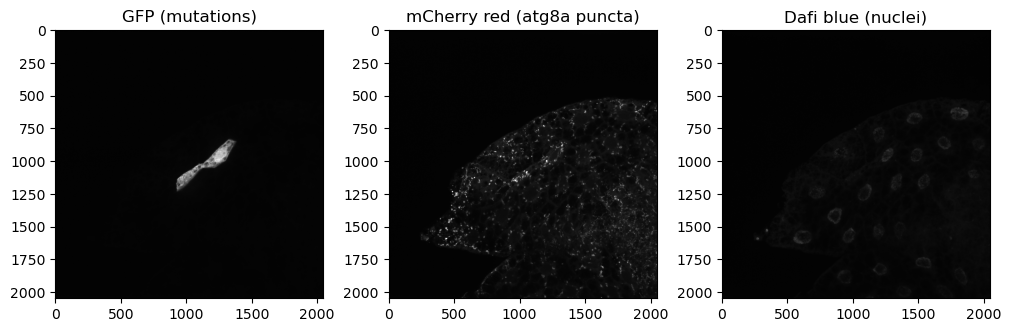

In [5]:
cwd = os.getcwd()
folder_path = cwd + "/Spot_segmentation_masks/" 
vmax_factor = 0.5

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file )
    if file.endswith(".tif"):
        img = io.imread(file_path)
        dat_path = file_path[:-4] + '_seg.npy'
        dat = np.load(dat_path, allow_pickle=True).item()
        
        plt.rcParams['figure.figsize'] = [10, 5] 
        fig, axes = plt.subplots(nrows=1, ncols=3, constrained_layout=True)
        
        grey_cmap = LinearSegmentedColormap.from_list("", ["black","white"])
        max_red = np.max(img)
        
        im1 = axes[0].imshow(img[:,:,0], cmap=grey_cmap, vmax = vmax_factor*max_red)
        im2 = axes[1].imshow(img[:,:,1], cmap=grey_cmap, vmax = vmax_factor*max_red)
        im2 = axes[2].imshow(img[:,:,2], cmap=grey_cmap, vmax = vmax_factor*max_red)

        axes[0].set_title('GFP (mutations)')
        axes[1].set_title('mCherry red (atg8a puncta)')
        axes[2].set_title('Dafi blue (nuclei)')

        plt.show()

### All original images (left) and the segmentation output (right)
- The bio group are not yet satisfied with the segmentation but they don't think they will get further with the method they are using today
- The colorbar is set to max 700. Even though the background intensity vary with camera setting etc this may give an idea on how the spots compare across images.
- Some spots look like they could also be noise
- There should also be quite some spots that have not been found, according to the biologist

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY1.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


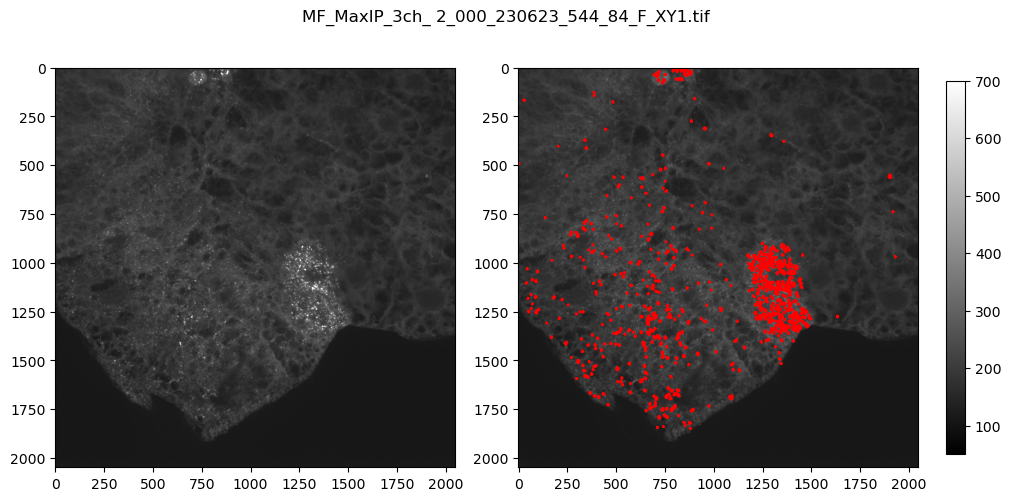

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY3.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


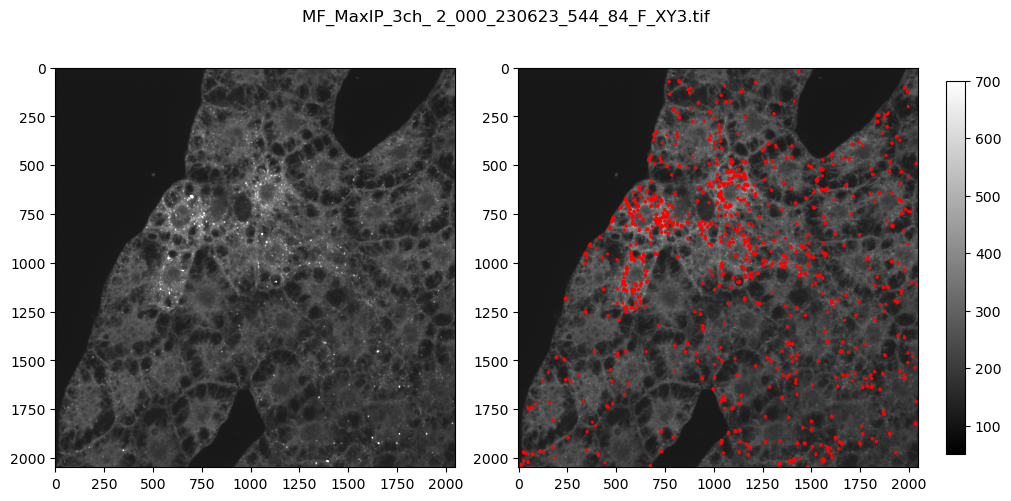

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY4.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


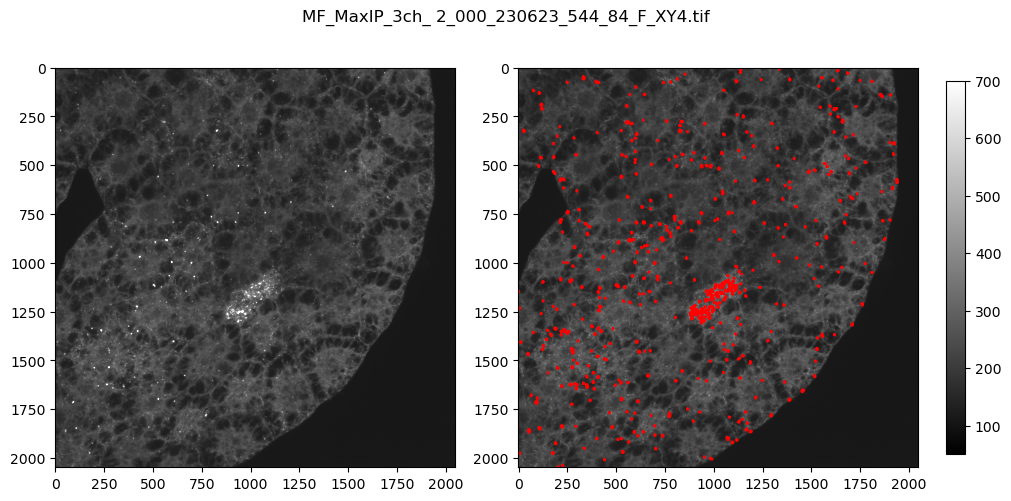

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY5.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


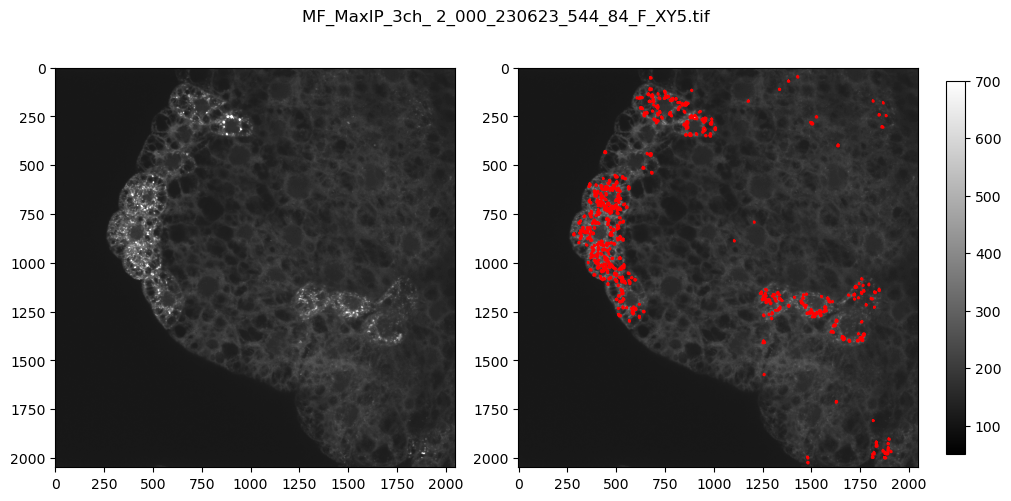

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY6.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


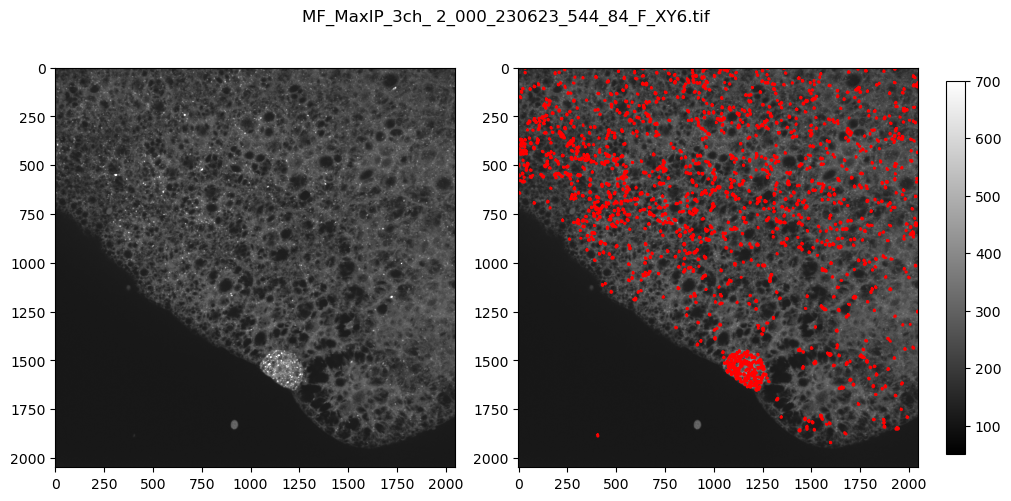

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_R1h_XY1.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


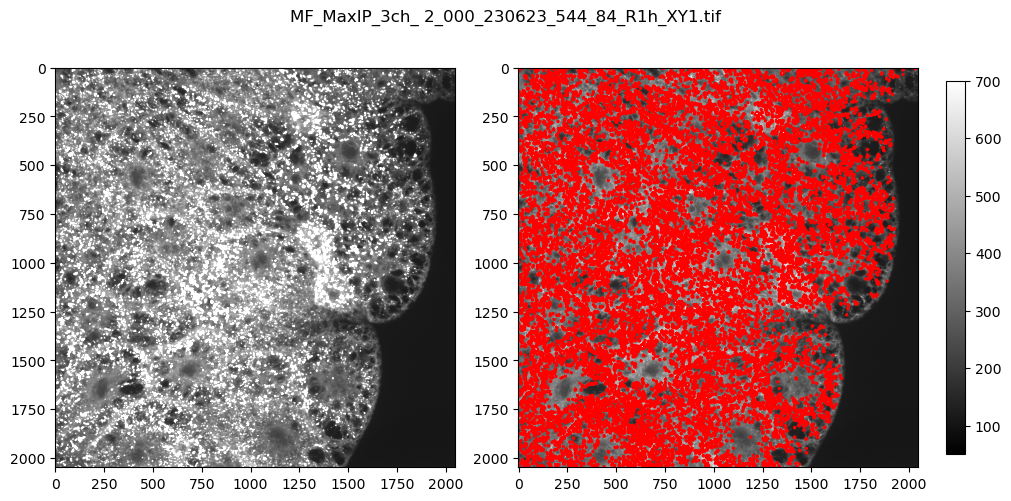

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_R1h_XY4.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


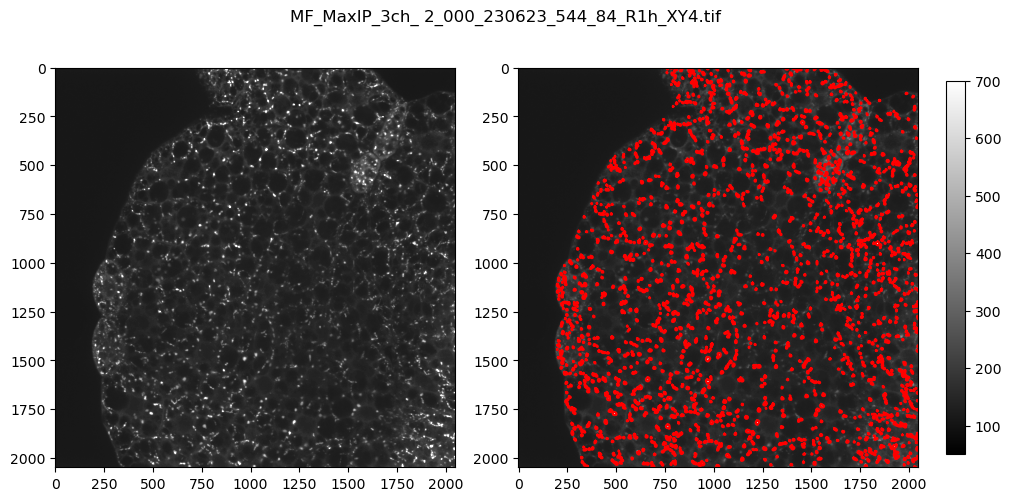

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_R1h_XY5.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


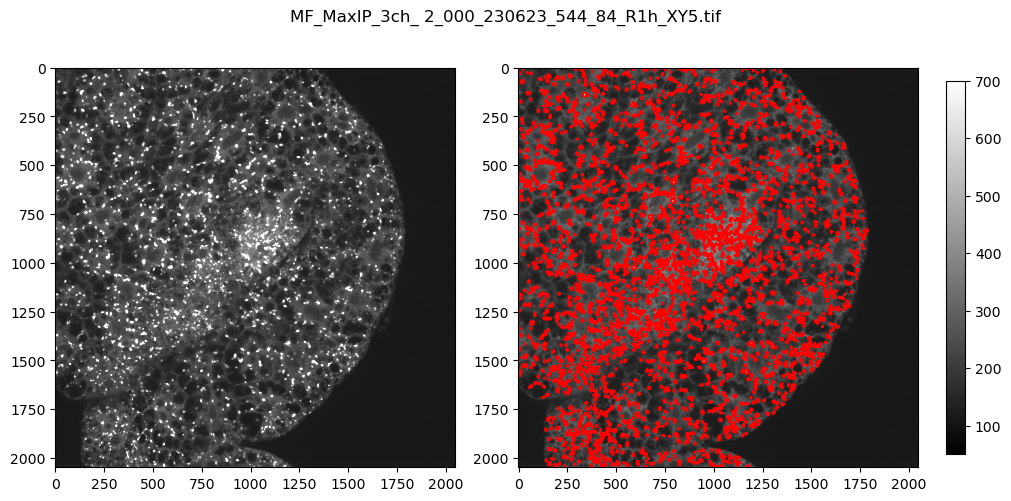

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_S4h_XY1.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


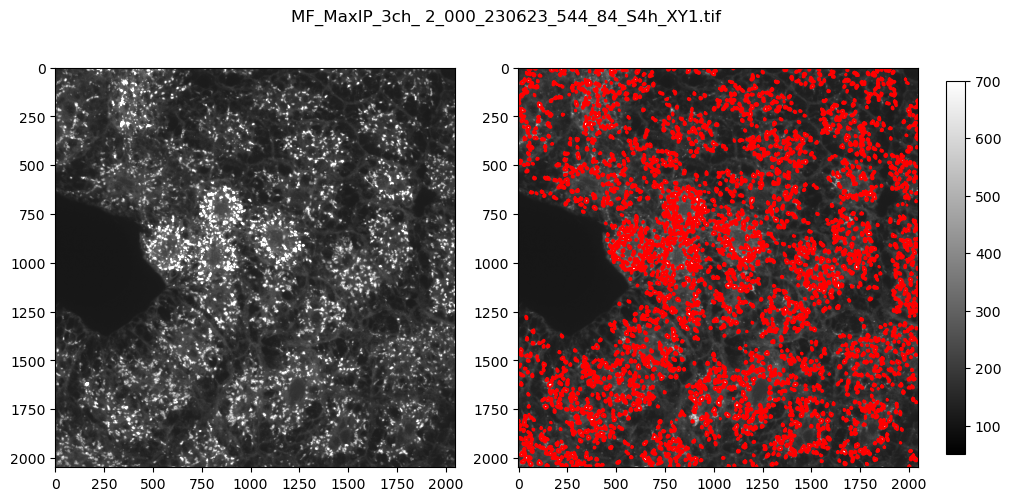

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_S4h_XY2.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


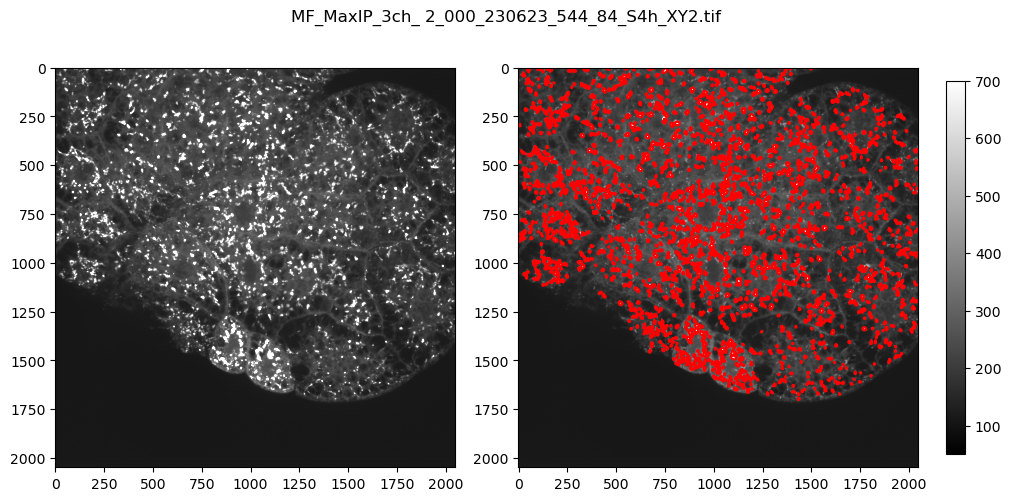

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_S4h_XY3.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


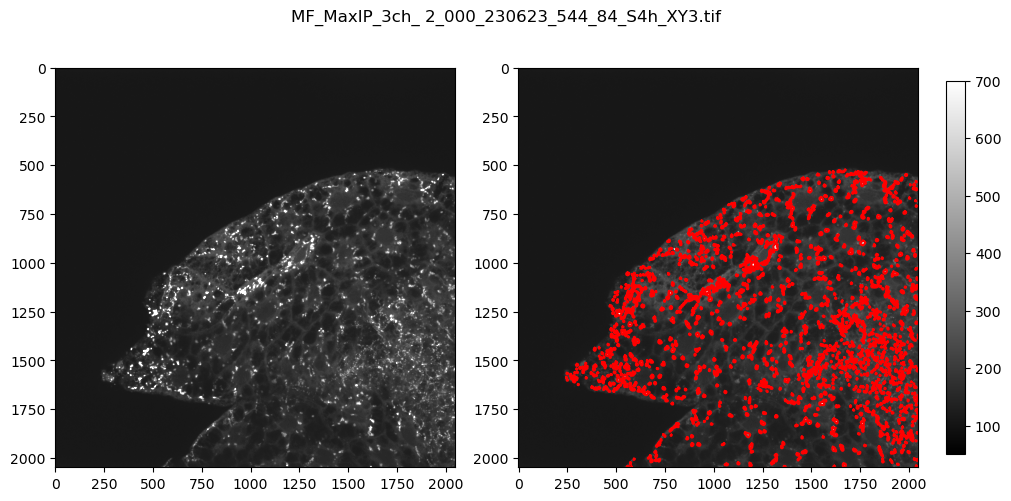

In [2]:
cwd = os.getcwd()
folder_path = cwd + "/Spot_segmentation_masks/" 
vmax_factor = 0.2

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file )
    if file.endswith(".tif"):
        img = io.imread(file_path)
        #img = img[:,:,0]
        dat_path = file_path[:-4] + '_seg.npy'
        dat = np.load(dat_path, allow_pickle=True).item()
        # plot image with masks overlaid
        mask_RGB = plot.mask_overlay(img[:,:,1], dat['masks'],
                                colors=np.array(dat['colors']))
        
        # plot image with outlines overlaid in red
        outlines = utils.outlines_list(dat['masks'])
        plt.rcParams['figure.figsize'] = [10, 5] 
        fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
        
        grey_cmap = LinearSegmentedColormap.from_list("", ["black","white"])
        max_red = np.max(img)
        
        im1 = axes[0].imshow(img[:,:,1], cmap=grey_cmap, vmin =50, vmax = 700)
        for o in outlines: 
            plt.plot(o[:,0], o[:,1], color='r')
        im2 = axes[1].imshow(img[:,:,1], cmap=grey_cmap, vmin = 50, vmax = 700)
        cbar = fig.colorbar(im1, ax=axes[1], shrink = 0.8)
        
        fig.suptitle(file)
        plt.show()



### Here are the histograms of the red spot images
- The first high peak is the black background. This peak is not really interesting since it would be cancelled once we have a good cell segmentation
- Can we find a threshold to filter out background?
- If we only keep spots above threshold level and do a masked loss function, can the images be used as GT?

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY1.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


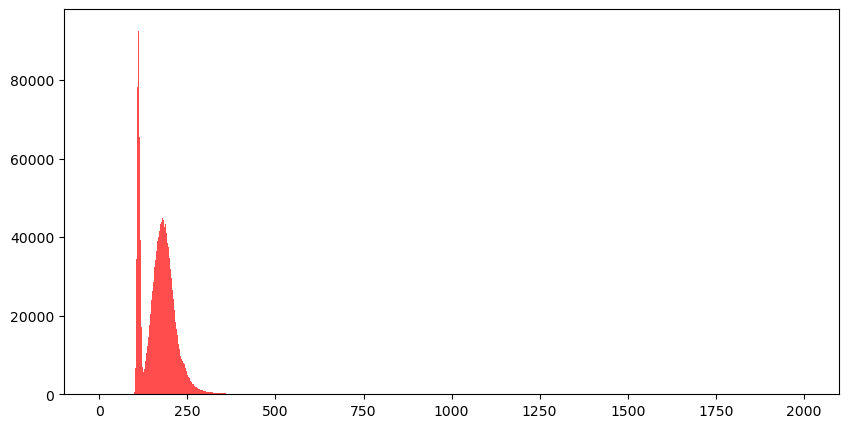

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY3.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


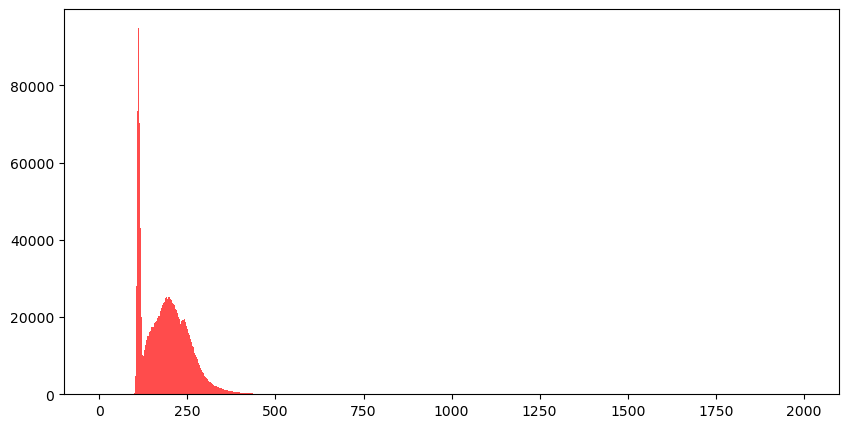

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY4.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


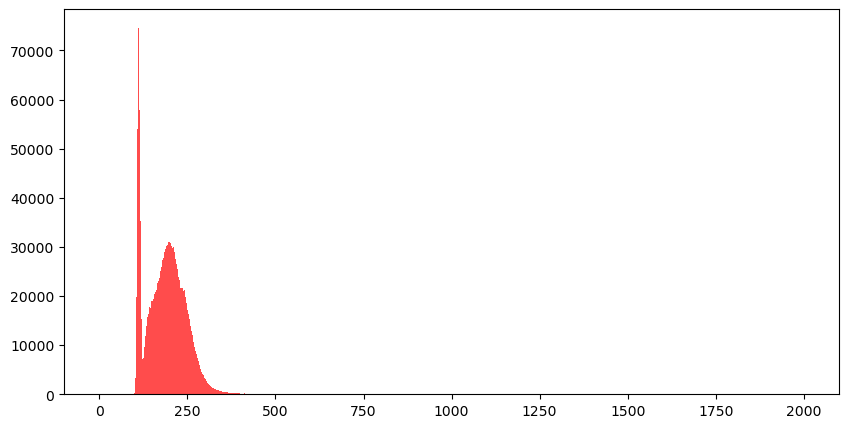

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY5.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


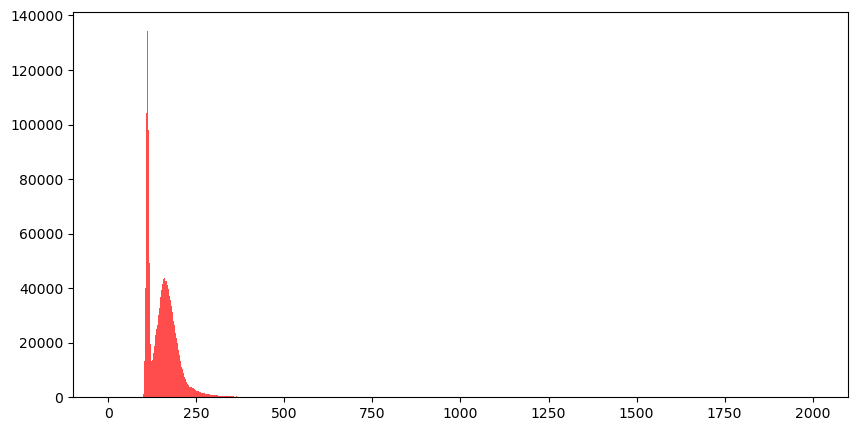

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…544_84_F_XY6.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


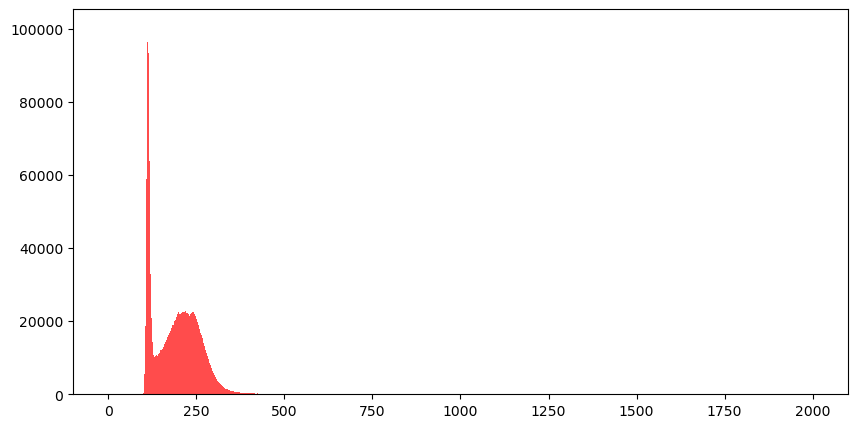

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_R1h_XY1.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


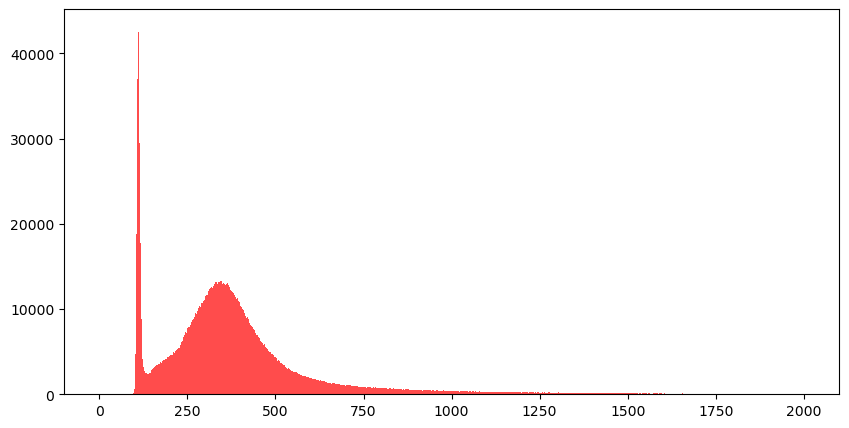

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_R1h_XY4.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


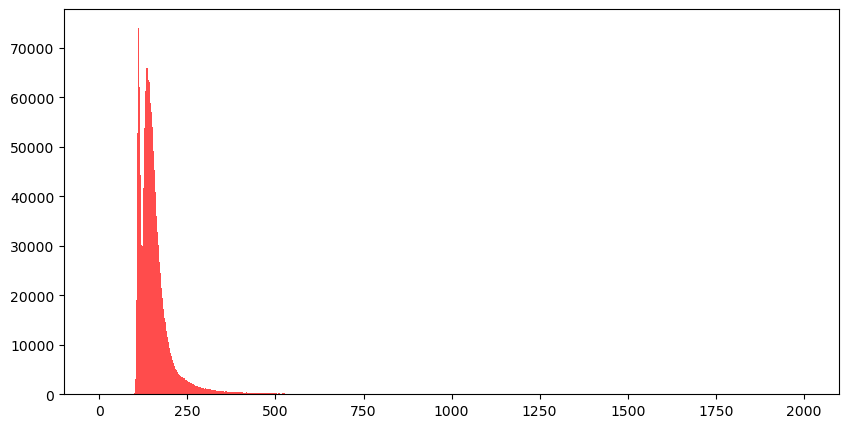

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_R1h_XY5.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


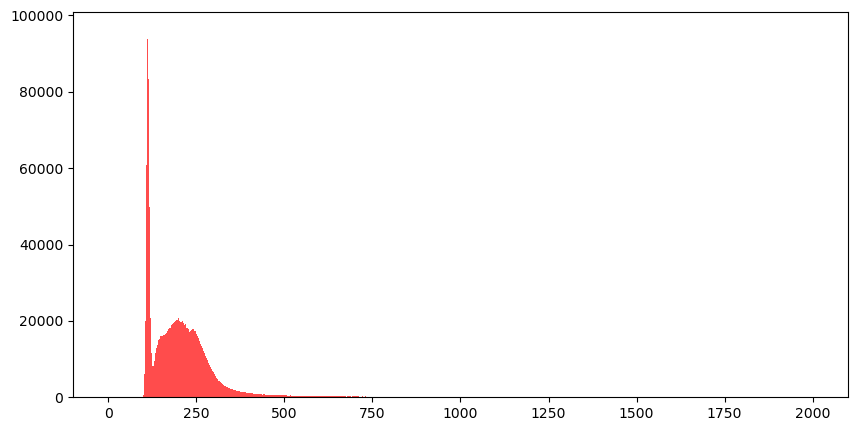

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_S4h_XY1.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


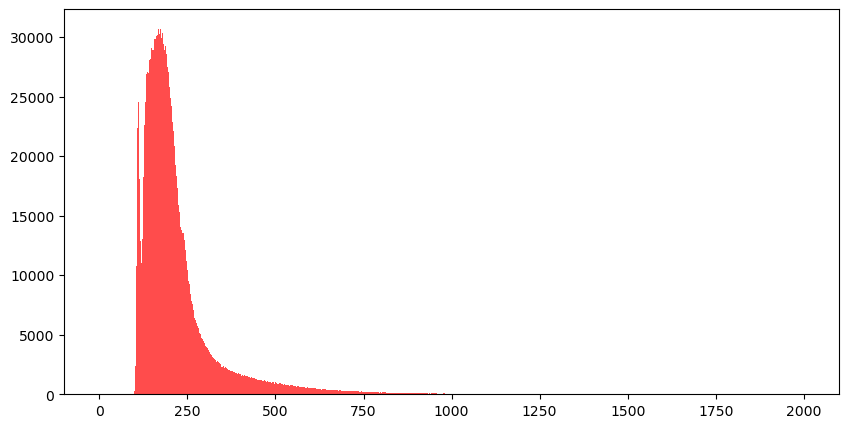

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_S4h_XY2.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


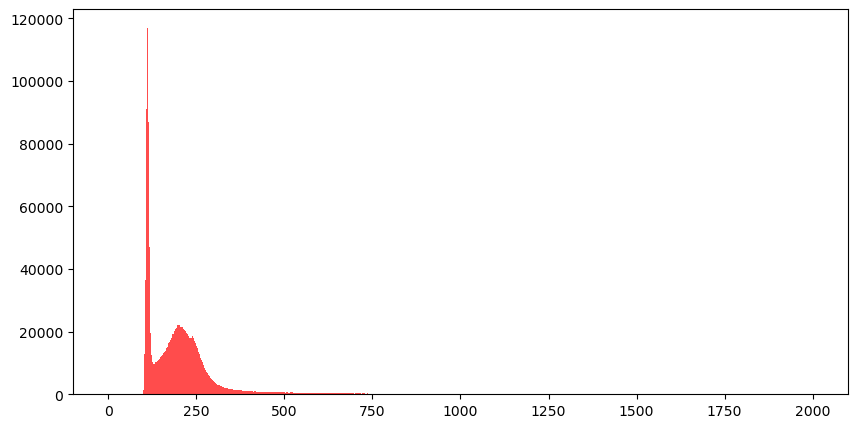

<tifffile.TiffFile 'MF_MaxIP_3ch_ 2…4_84_S4h_XY3.tif'> OME series cannot handle discontiguous storage ((2048, 2048, 3) != (3, 2048, 2048))


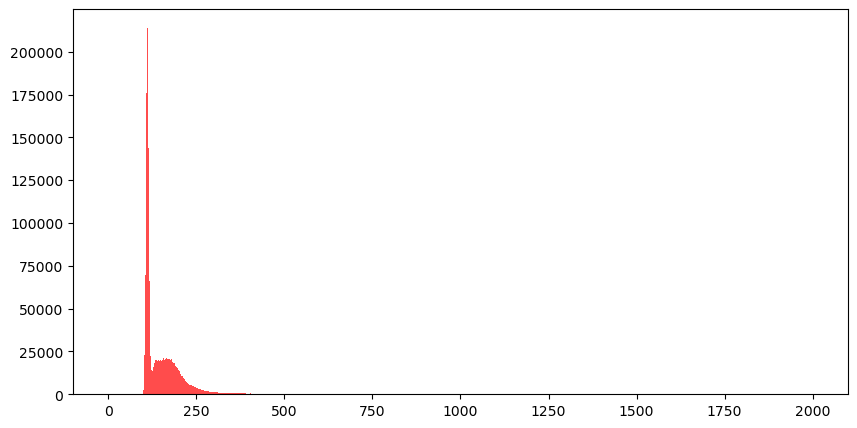

In [8]:
cwd = os.getcwd()
folder_path = cwd + "/Spot_segmentation_masks/" 

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file )
    if file.endswith(".tif"):
        img = io.imread(file_path)
        red_image_flat = img[:,:,1].flatten()
        plt.hist(red_image_flat,bins = 2000, range= (0,2000), alpha=0.7, color='red')
        plt.show()

